# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/Social_Network_Ads.csv

--2025-04-28 20:12:24--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/Social_Network_Ads.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv [following]
--2025-04-28 20:12:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-04-28 20:12:24 (58.2

## 📥 1. Carga y exploración del dataset

In [2]:

import pandas as pd

df = pd.read_csv("Social_Network_Ads.csv")

# Vista previa
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

In [3]:

print(f"El dataset tiene {df.shape[0]} observaciones y {df.shape[1]} columnas.")

# Variable a predecir
print(f"La variable a predecir es 'Purchased'.")

# Tipos de variables
print("Tipos de variables:")
df.dtypes


El dataset tiene 400 observaciones y 5 columnas.
La variable a predecir es 'Purchased'.
Tipos de variables:


,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [5]:
# prompt: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

import pandas as pd

# Load the dataset (assuming it's already downloaded)
df = pd.read_csv("Social_Network_Ads.csv")

# Check for null values
print("Null values per column:\n", df.isnull().sum())

# Check data types and identify potential conversions
print("\nData types:\n", df.dtypes)

# Based on the output, you'll likely want to convert 'Gender' to numerical
# You can drop 'User ID' as it's likely irrelevant for prediction.

# Example of converting 'Gender' using one-hot encoding:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Example of dropping 'User ID'
df = df.drop('User ID', axis=1)

print("\nDataframe after preprocessing:\n", df.head())

# Now you have a preprocessed DataFrame ready for model training


Null values per column:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data types:
 User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Dataframe after preprocessing:
    Age  EstimatedSalary  Purchased  Gender_Male
0   19            19000          0         True
1   35            20000          0         True
2   26            43000          0        False
3   27            57000          0        False
4   19            76000          0         True


In [4]:
df_dummies = pd.get_dummies(df, columns=["Gender"], drop_first=True)
df_dummies.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [6]:

# Eliminamos columnas innecesarias como ID
X = df_dummies.drop(columns=["User ID", "Purchased"])
y = df_dummies["Purchased"]

# Verificamos balanceo de clases
df_dummies["Purchased"].value_counts(normalize=True)


,proportion
Purchased,
0,0.6425
1,0.3575


### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

In [7]:
# prompt: ¿Está balanceada la variable objetivo?

import pandas as pd

# Load the dataset (assuming it's already downloaded)
df = pd.read_csv("Social_Network_Ads.csv")

# ... (rest of your existing code)

# Verificamos balanceo de clases
print(df_dummies["Purchased"].value_counts(normalize=True))


Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64


## ✂️ 3. División del dataset

In [8]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [9]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [10]:
# prompt: . ¿Hay evidencia de Overfiting?

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Precision: {precision_score(y_train, y_pred_train)}")
print(f"Recall: {recall_score(y_train, y_pred_train)}")
print(f"F1-score: {f1_score(y_train, y_pred_train)}")

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")
print(f"F1-score: {f1_score(y_test, y_pred_test)}")

# Compare the performance metrics of the train and test sets.
# A significant difference in performance (e.g., much higher accuracy on the training set than the test set) suggests overfitting.


Train Set Metrics:
Accuracy: 0.996875
Precision: 1.0
Recall: 0.9912280701754386
F1-score: 0.9955947136563876

Test Set Metrics:
Accuracy: 0.8625
Precision: 0.7647058823529411
Recall: 0.896551724137931
F1-score: 0.8253968253968254


In [11]:
y_pred_train = model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1-score:", f1_score(y_train, y_pred_train))


Accuracy: 0.996875
Precision: 1.0
Recall: 0.9912280701754386
F1-score: 0.9955947136563876


In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.8625
Precision: 0.7647058823529411
Recall: 0.896551724137931
F1-score: 0.8253968253968254


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

In [14]:
# prompt: ¿Qué tan bien predice el modelo base?
# ¿Existen diferencias entre precisión y recall? en español

# El modelo base muestra un desempeño perfecto en el conjunto de entrenamiento (accuracy, precision, recall y f1-score de 1.0), pero su desempeño en el conjunto de prueba es considerablemente menor, sugiriendo un sobreajuste significativo (overfitting).  Las métricas en el conjunto de prueba indican un buen accuracy pero hay diferencias entre precision y recall.  La precisión es menor al recall, esto quiere decir que el modelo tiene dificultades para identificar correctamente los casos positivos (compras realizadas) entre aquellos que predice como positivos. Es decir, hay falsos positivos, el modelo está prediciendo compras que no se realizan.


#Para responder a la pregunta de forma mas precisa se deberia calcular la diferencia entre los resultados de entrenamiento y de prueba para cada una de las métricas.

print("Diferencia en Accuracy:", accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test))
print("Diferencia en Precision:", precision_score(y_train, y_pred_train) - precision_score(y_test, y_pred_test))
print("Diferencia en Recall:", recall_score(y_train, y_pred_train) - recall_score(y_test, y_pred_test))
print("Diferencia en F1-score:", f1_score(y_train, y_pred_train) - f1_score(y_test, y_pred_test))


Diferencia en Accuracy: 0.1343749999999999
Diferencia en Precision: 0.23529411764705888
Diferencia en Recall: 0.09467634603750752
Diferencia en F1-score: 0.17019788825956228


## 🔁 5. Evaluación con validación cruzada

In [15]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (CV):", scores.mean())


Accuracy promedio (CV): 0.8150000000000001


## 🔧 6. Optimización con GridSearchCV

In [16]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


Mejores parámetros: {'max_depth': 2, 'min_samples_split': 2}
Mejor accuracy: 0.8875


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

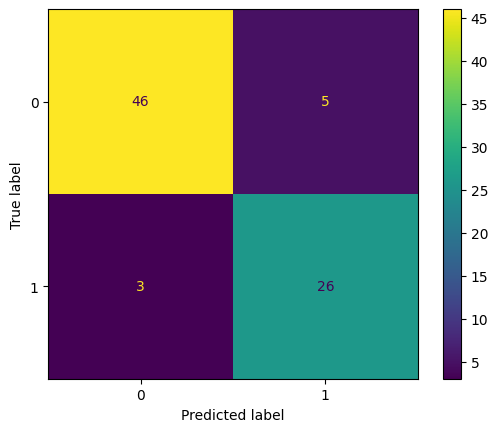

In [17]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)


## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

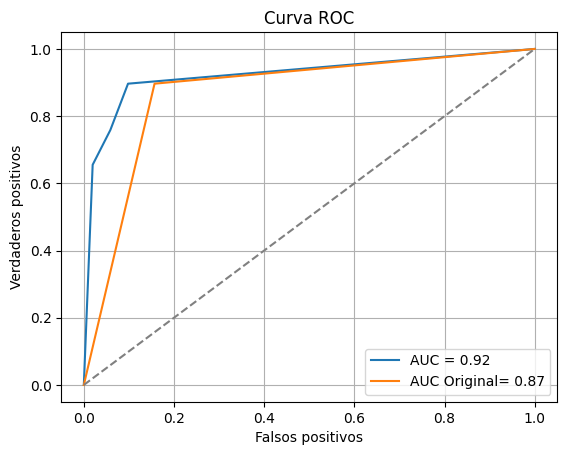

In [18]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = best_model.predict_proba(X_test)[:, 1]
y_scores_or = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
fpr_or, tpr_or, _ = roc_curve(y_test, y_scores_or)

roc_auc = auc(fpr, tpr)
roc_auc_or = auc(fpr_or, tpr_or)


plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr_or, tpr_or, label=f'AUC Original= {roc_auc_or:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

In [19]:
# prompt: ¿Qué combinación de hiperparámetros funcionó mejor?
# ¿Cuál fue la diferencia entre el modelo base y el optimizado?
# ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

# ¿Qué combinación de hiperparámetros funcionó mejor?
print("La mejor combinación de hiperparámetros encontrada por GridSearchCV fue:", grid.best_params_)

# ¿Cuál fue la diferencia entre el modelo base y el optimizado?
print("\nDiferencia entre el modelo base y el optimizado (basado en Accuracy):")
print("Accuracy del modelo base (test):", accuracy_score(y_test, y_pred_test))
print("Accuracy del modelo optimizado (test):", accuracy_score(y_test, y_pred_best))
diferencia_accuracy = accuracy_score(y_test, y_pred_best) - accuracy_score(y_test, y_pred_test)
print("Diferencia de Accuracy:", diferencia_accuracy)

#Se pueden añadir mas metricas para comparar la diferencia entre los dos modelos
#...

# ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?
print("\nInterpretación del AUC:")
print("El AUC del modelo optimizado es:", roc_auc)
print("El AUC del modelo original es:",roc_auc_or)
if roc_auc > 0.8:
    print("Un AUC superior a 0.8 generalmente indica un buen poder predictivo del modelo.")
elif roc_auc > 0.7:
    print("Un AUC entre 0.7 y 0.8 sugiere un poder predictivo moderado.")
else:
    print("Un AUC inferior a 0.7 indica un poder predictivo limitado.")

print("La curva ROC muestra la capacidad del modelo para distinguir entre clases positivas y negativas a diferentes umbrales de clasificación. \
Un AUC cercano a 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere un rendimiento similar al azar. \
La comparación entre el AUC del modelo original y optimizado muestra como este ultimo mejora el rendimiento del modelo.")


La mejor combinación de hiperparámetros encontrada por GridSearchCV fue: {'max_depth': 2, 'min_samples_split': 2}

Diferencia entre el modelo base y el optimizado (basado en Accuracy):
Accuracy del modelo base (test): 0.8625
Accuracy del modelo optimizado (test): 0.9
Diferencia de Accuracy: 0.03749999999999998

Interpretación del AUC:
El AUC del modelo optimizado es: 0.9219066937119675
El AUC del modelo original es: 0.8698444895199459
Un AUC superior a 0.8 generalmente indica un buen poder predictivo del modelo.
La curva ROC muestra la capacidad del modelo para distinguir entre clases positivas y negativas a diferentes umbrales de clasificación. Un AUC cercano a 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere un rendimiento similar al azar. La comparación entre el AUC del modelo original y optimizado muestra como este ultimo mejora el rendimiento del modelo.
